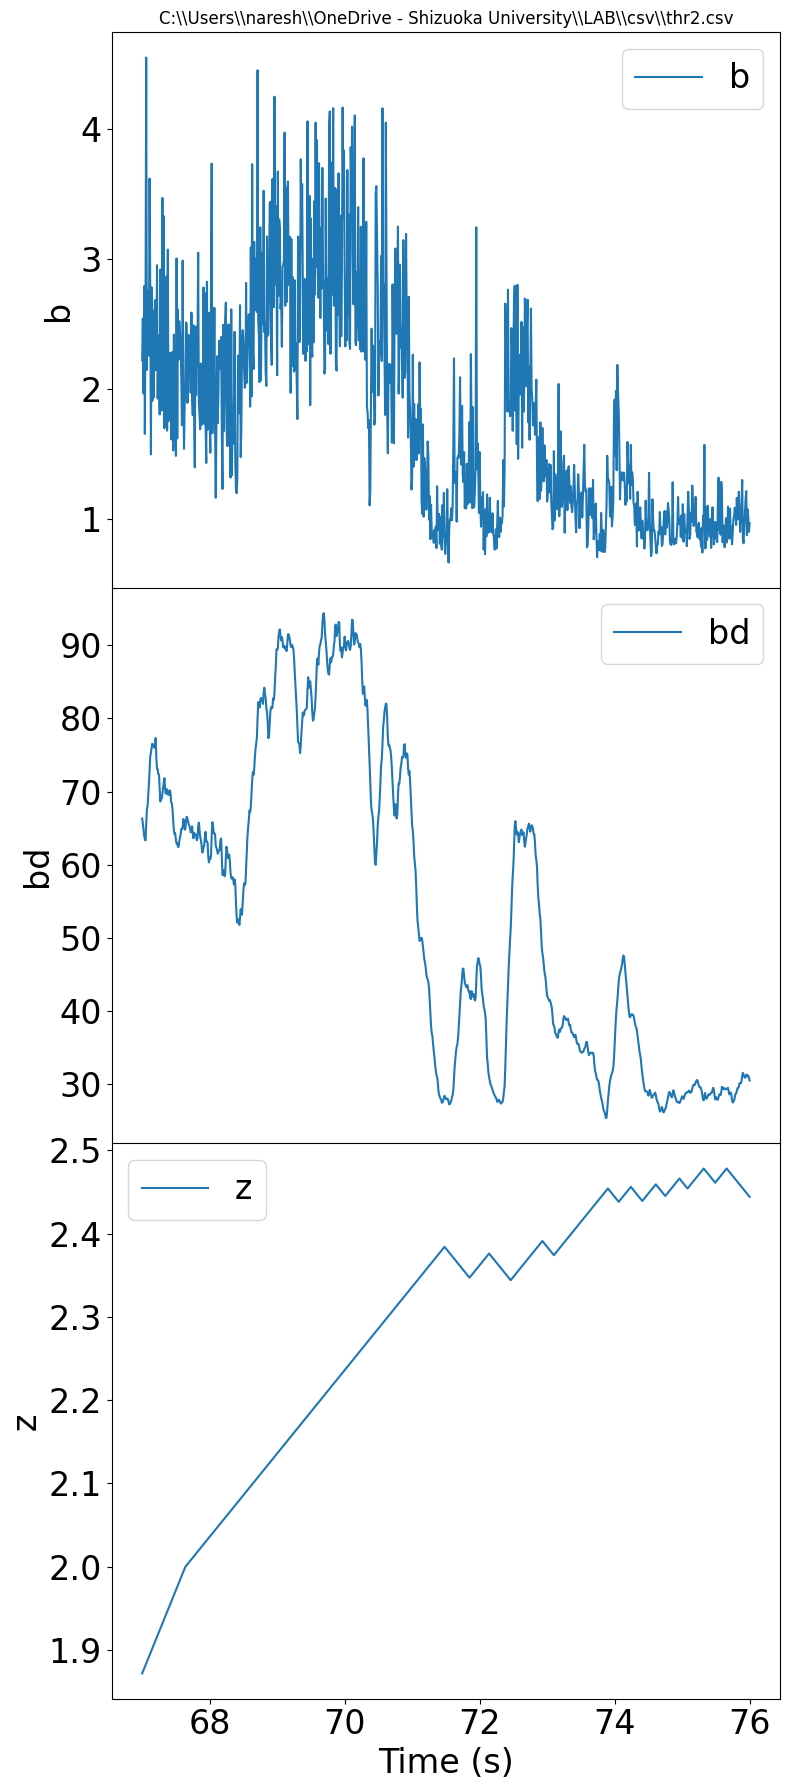

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the double_backslashes function
def double_backslashes(input_string):
    return input_string.replace('\\', '\\\\')

# Define the CSVPlotter class
class CSVPlotter:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def read_csv(self):
        try:
            self.data = pd.read_csv(self.file_path)
        except FileNotFoundError:
            print("File not found. Please provide a valid file path.")
    
    def plot_data(self, x_column, y_columns, plot_type='line', title='', x_label='', y_label='', font_size=24):
        if self.data is None:
            self.read_csv()

        self.data[x_column] = (self.data[x_column]) / 10
        fig, axs = plt.subplots(len(y_columns), 1, figsize=(8, 6 * len(y_columns)), sharex=True, gridspec_kw={'hspace': 0})
        hori= 0.25
        for i, col in enumerate(y_columns):
            axs[i].plot(self.data[x_column], self.data[col], label=col)
            axs[i].set_title('')  # Clear subplot title
            axs[0].set_title(self.file_path)  # Clear subplot title
            axs[i].set_xlabel('')  # Clear x-label for all subplots
            axs[i].set_ylabel(col, fontsize=font_size)  # Set ylabel to the column name with custom font size
            axs[i].tick_params(axis='y', labelsize=font_size)
            axs[i].legend(fontsize=font_size)

            if i < len(y_columns) - 1:
                axs[i].get_xaxis().set_visible(False)  # Hide x-axis for all except the last subplot

        axs[-1].set_xlabel(x_label, fontsize=font_size)  # Set x-label only for the last subplot
        axs[0].set_title(self.file_path)  # Clear subplot title

        # Hide top and right spines and ticks for all subplots except the bottom one
        for ax in axs[:-1]:
            ax.spines['bottom'].set_visible(False)
            ax.xaxis.set_ticks_position('none')

        # Set font sizes for tick labels
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)

        plt.tight_layout()
        plt.show()

# Create an instance of CSVPlotter with the converted file path
converted_string = double_backslashes(r"C:\Users\naresh\OneDrive - Shizuoka University\LAB\csv\thr2.csv")
csv_plotter = CSVPlotter(converted_string)

# Call the plot_data method to generate the graph
csv_plotter.plot_data(x_column='sn', y_columns=['b','bd','z'], plot_type='line', title='CSV Data Plot', x_label='Time (s)', y_label='Y-axis', font_size=24)


In [6]:
import os

# Function to get a list of CSV files in a folder
def get_csv_files(folder_path):
    csv_files = []
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            csv_files.append(os.path.join(folder_path, file))
    return csv_files

# Get a list of CSV files in the folder
folder_path = r"C:\Users\naresh\OneDrive - Shizuoka University\LAB\graphs\bin.zip\bin"
csv_files = get_csv_files(folder_path)

# Iterate over each CSV file and plot data
for file_path in csv_files:
    converted_string = double_backslashes(file_path)
    csv_plotter = CSVPlotter(converted_string)
    csv_plotter.plot_data(x_column='time(s)', y_columns=['BD','SD','PZT'], plot_type='line', title='CSV Data Plot', x_label='Time (s)', y_label='Y-axis', font_size=24)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\naresh\\OneDrive - Shizuoka University\\LAB\\graphs\\bin.zip\\bin'